Test interpolate_multi_object_data


project = []

EVENT_TYPE = 'SlideAround'

SESSION_NAMES = ['Session1', 'Session2']

for session_name in SESSION_NAMES:

    ### First load the session data
    session = load_one_param_file(os.path.join( DATA_DIR, EVENT_TYPE, session_name, 'files.param'))

    ### Turn all cube objects into 2D
    #### This action add data into session 
    #### session_data[SESSION_OBJ_2D]
    project_to2d(session, from_frame = 0, to_frame = session[SESSION_LEN])

    ### Interpolate object_2d
    #### session_data[SESSION_OBJ_2D] is interpolated
    interpolate_multi_object_data( session, object_names = object_2d.keys() )

    project.append(session)

### You can visualize the session now with
animate_event(session, event_index = 0)

### This function needs the whole project
down_sample_quotient = get_down_sample_quotient(project)

speed = get_action_speed(project, down_sample_quotient)

### This function actually removes session_data[SESSION_OBJECTS]
down_sampled_project = down_sample(project, down_sample_quotient)

### This will add session_data[SESSION_FEAT]
for session in down_sampled_project:
    qsr_feature_extractor(session, get_location_objects = get_location_objects_most_active)
    
turn_to_intermediate_data( project_data, 13, 20, 5)

In [1]:
import numpy as np
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from simulator.utils import Cube2D, Transform2D


In [2]:
from utils import SESSION_NAME, SESSION_OBJ_2D, SESSION_OBJECTS, SESSION_EVENTS, SESSION_LEN, SESSION_FEAT,\
            START, END, LABEL

In [10]:
session = {}
session[SESSION_NAME] = 'Session 1'
session[SESSION_LEN] = 100

session[SESSION_OBJ_2D] = {}
session[SESSION_OBJ_2D]['Stella Artois'] = {}
session[SESSION_OBJ_2D]['Shell'] = {}

session[SESSION_OBJ_2D]['Stella Artois'][20] = Cube2D(transform = Transform2D([0.0, 1.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][30] = Cube2D(transform = Transform2D([1.0, 1.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][50] = Cube2D(transform = Transform2D([1.0, 0.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][60] = Cube2D(transform = Transform2D([0.0, 0.0], 0.1, 0.09))

session[SESSION_OBJ_2D]['Shell'][50] = Cube2D(transform = Transform2D([0.5, 0.5], 0.1, 0.09))

session[SESSION_EVENTS] = [ {START: 20, END:60, LABEL:['Stella Artois', 'Shell']} ]

In [11]:
session

{'session_events': [{'end': 60,
   'label': ['Stella Artois', 'Shell'],
   'start': 20}],
 'session_length': 100,
 'session_name': 'Session 1',
 'session_obj_2d': {'Shell': {50: <simulator.utils.Cube2D at 0x1939f35b668>},
  'Stella Artois': {20: <simulator.utils.Cube2D at 0x1939f315748>,
   30: <simulator.utils.Cube2D at 0x1939f315828>,
   50: <simulator.utils.Cube2D at 0x1939f35b978>,
   60: <simulator.utils.Cube2D at 0x1939f35bf28>}}}

In [12]:
from session_util import interpolate_multi_object_data

interpolate_multi_object_data(session, object_names = session[SESSION_OBJ_2D].keys())

In [13]:
from visualizer import animate_event

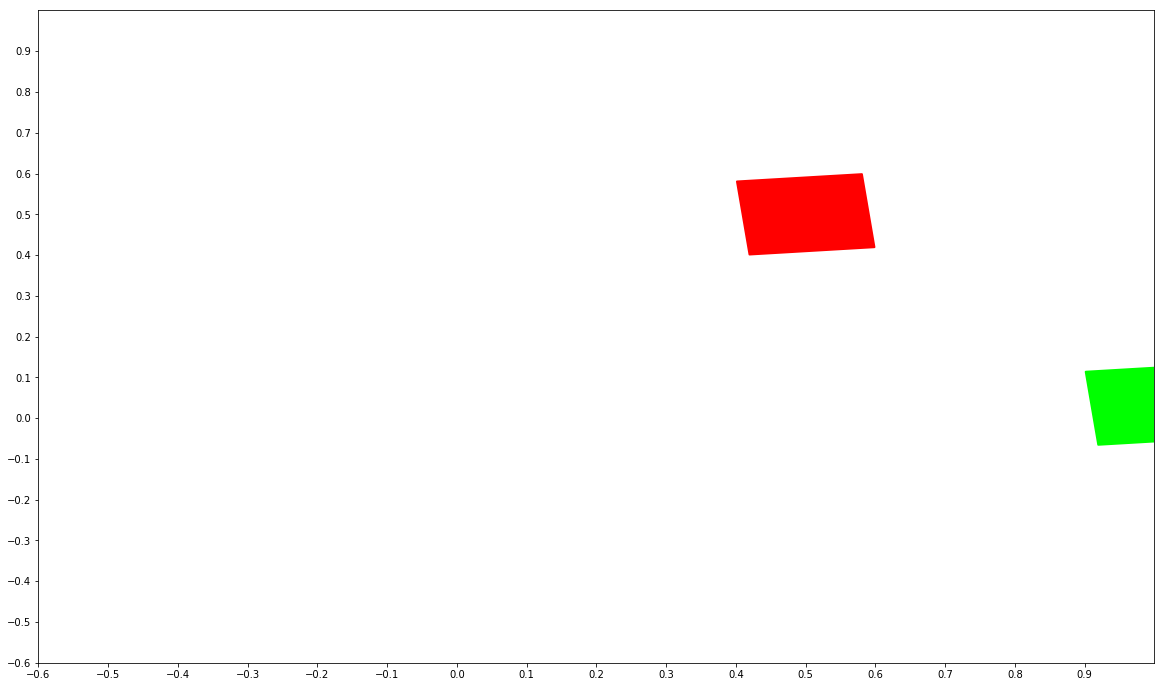

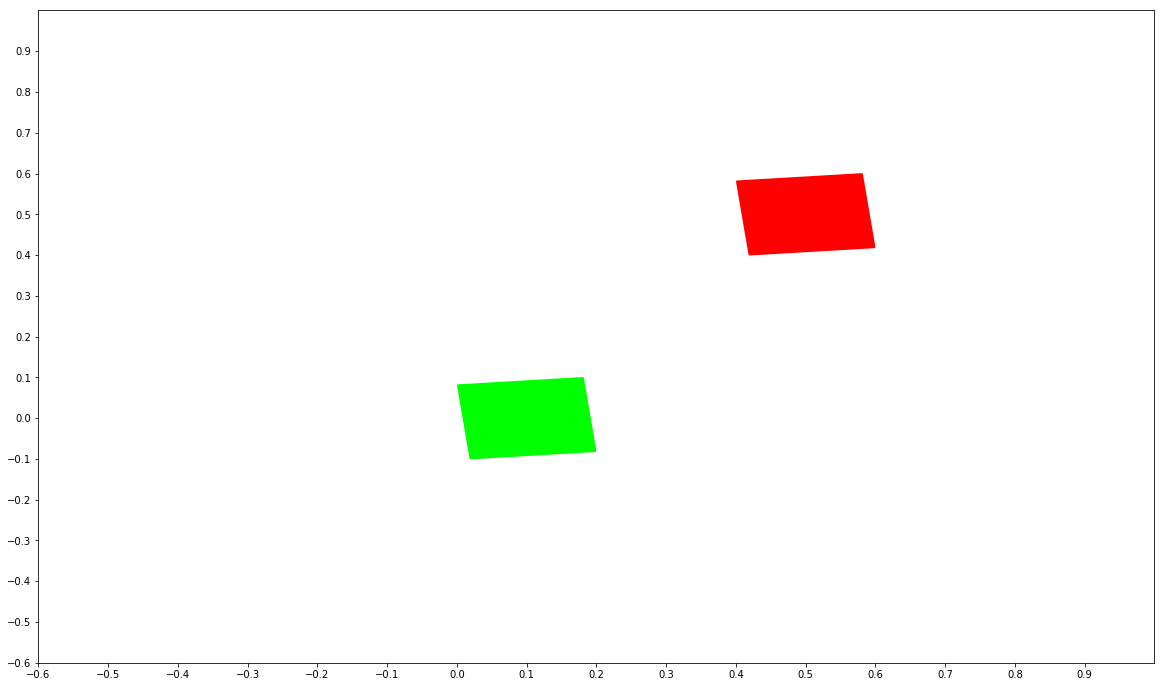

In [14]:
animate_event(session, 0)

In [15]:
len(session[SESSION_OBJ_2D]['Stella Artois'])
len(session[SESSION_OBJ_2D]['Shell'])

100